In [21]:
import cv2
from scipy.ndimage import convolve
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
import glob

image_path = 'sample_data/11-20/00020.tiff'

image = cv2.imread(image_path)

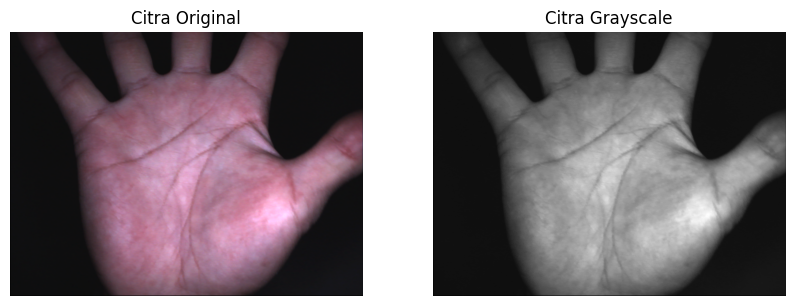

In [22]:
citra_rgb = image[..., ::-1]

alpha = 1.5  # Nilai alpha > 1 untuk meningkatkan kontras
beta = 0    # Nilai beta bisa diubah sesuai kebutuhan

new_image = cv2.convertScaleAbs(citra_rgb, alpha=alpha, beta=beta)
R = new_image[..., 0]
G = new_image[..., 1]
B = new_image[..., 2]

citra_grayscale = 0.2989 * R + 0.5870 * G + 0.1140 * B
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(new_image,cmap='gray')
axes[0].set_title("Citra Original")
axes[0].axis('off')
axes[1].imshow(citra_grayscale, cmap='gray')
axes[1].set_title("Citra Grayscale")
axes[1].axis('off')

plt.show()

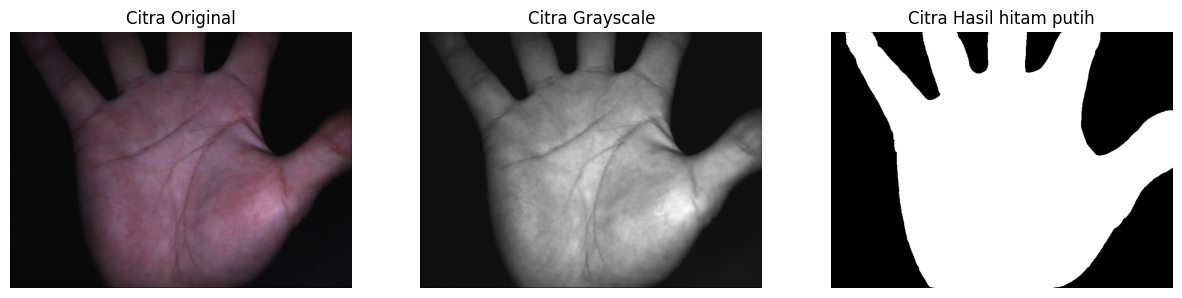

In [23]:

blur_img = cv2.GaussianBlur(citra_grayscale.astype('uint8'), (5, 5), 0)
threshold = 30
thresh_img = (blur_img > threshold).astype(np.uint8) * 255
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(citra_rgb)
axes[0].set_title("Citra Original")
axes[0].axis('off')

axes[1].imshow(citra_grayscale, cmap='gray')
axes[1].set_title("Citra Grayscale")
axes[1].axis('off')

axes[2].imshow(thresh_img,cmap='gray')
axes[2].set_title("Citra Hasil hitam putih")
axes[2].axis('off')

plt.show()

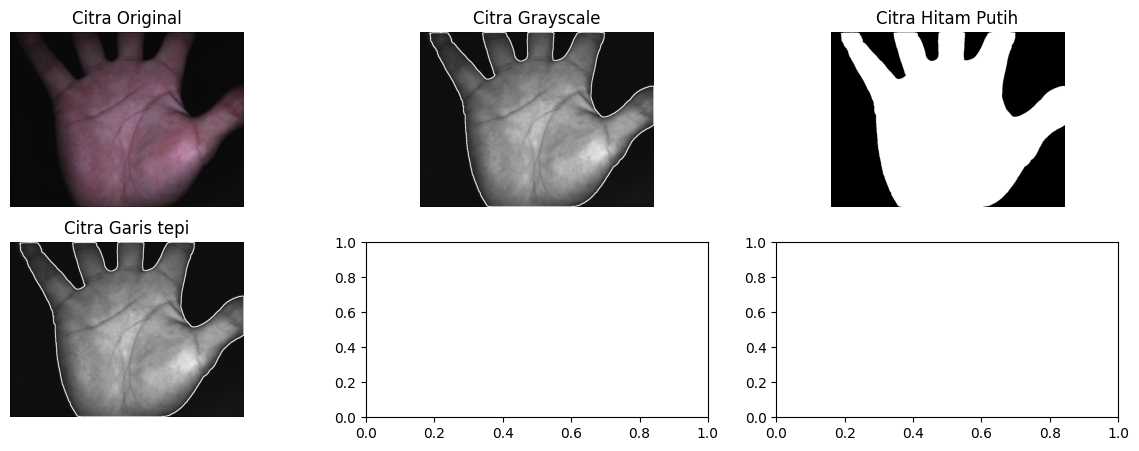

In [24]:
# Assuming contours have already been found using a method like cv2.findContours
contours, _ = cv2.findContours(thresh_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# Copy the original image to draw contours on it
contour_img = new_image.copy()
# Draw the contours on the image
boundary_image=cv2.drawContours(citra_grayscale, contours, -1, (255, 0, 0), 2)
fig, axes = plt.subplots(2, 3, figsize=(15, 5))



axes[0,0].imshow(citra_rgb)
axes[0,0].set_title("Citra Original")
axes[0,0].axis('off')

axes[0,1].imshow(citra_grayscale, cmap='gray')
axes[0,1].set_title("Citra Grayscale")
axes[0,1].axis('off')

axes[0,2].imshow(thresh_img,cmap='gray')
axes[0,2].set_title("Citra Hitam Putih")
axes[0,2].axis('off')

axes[1,0].imshow(boundary_image, cmap='gray')
axes[1,0].set_title("Citra Garis tepi")
axes[1,0].axis('off')

plt.show()


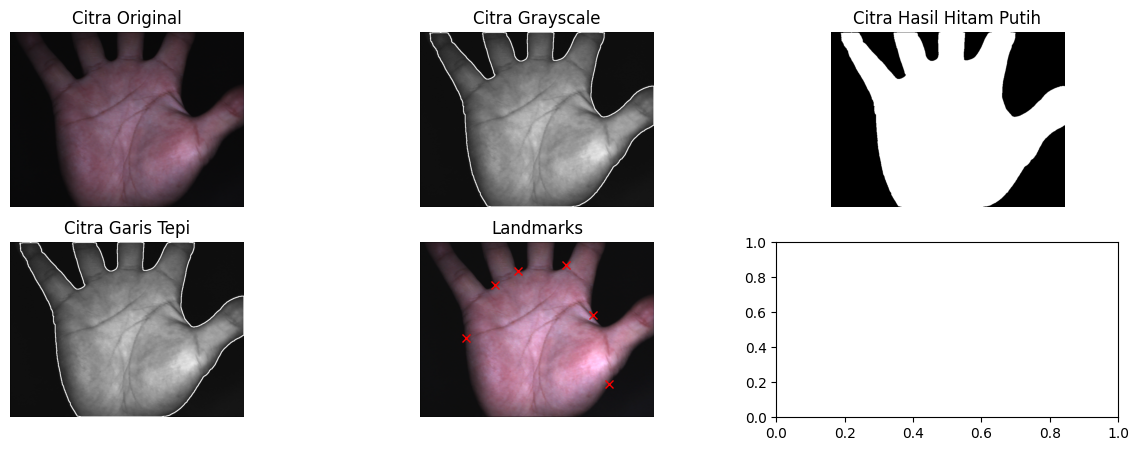

In [25]:
M = cv2.moments(thresh_img)
x_c = M['m10'] // M['m00']
y_c = M['m01'] // M['m00']
center_point = {"x": x_c, "y": y_c}
contours =contours[0]
contours = contours.reshape(-1, 2)
left_id = np.argmin(contours.sum(-1))
contours = np.concatenate([contours[left_id:, :], contours[:left_id, :]])
dist_c = np.sqrt(np.square(contours - [center_point["x"], center_point["y"]]).sum(-1))
f = np.fft.rfft(dist_c)
cutoff = 15
f_new = np.concatenate([f[:cutoff], 0*f[cutoff:]])
dist_c_1 = np.fft.irfft(f_new)
derivative = np.diff(dist_c_1)
sign_change = np.diff(np.sign(derivative))/2
landmarks = {"x": [], "y": []}
for landmark in contours[np.where(sign_change > 0)[0]]:
  landmarks["x"].append(landmark[0])
  landmarks["y"].append(landmark[1])

fig, axes = plt.subplots(2, 3, figsize=(15, 5))
axes[0,0].imshow(citra_rgb)
axes[0,0].set_title("Citra Original")
axes[0,0].axis('off')

axes[0,1].imshow(citra_grayscale, cmap='gray')
axes[0,1].set_title("Citra Grayscale")
axes[0,1].axis('off')

axes[0,2].imshow(thresh_img,cmap='gray')
axes[0,2].set_title("Citra Hasil Hitam Putih")
axes[0,2].axis('off')

axes[1,0].imshow(boundary_image, cmap='gray')
axes[1,0].set_title("Citra Garis Tepi")
axes[1,0].axis('off')

axes[1, 1].imshow(contour_img, cmap='gray')
for idx in range(len(landmarks["x"])):
    axes[1, 1].plot(landmarks["x"][idx], landmarks["y"][idx], 'rx')
axes[1, 1].set_title("Landmarks")
axes[1, 1].axis('off')

plt.show()


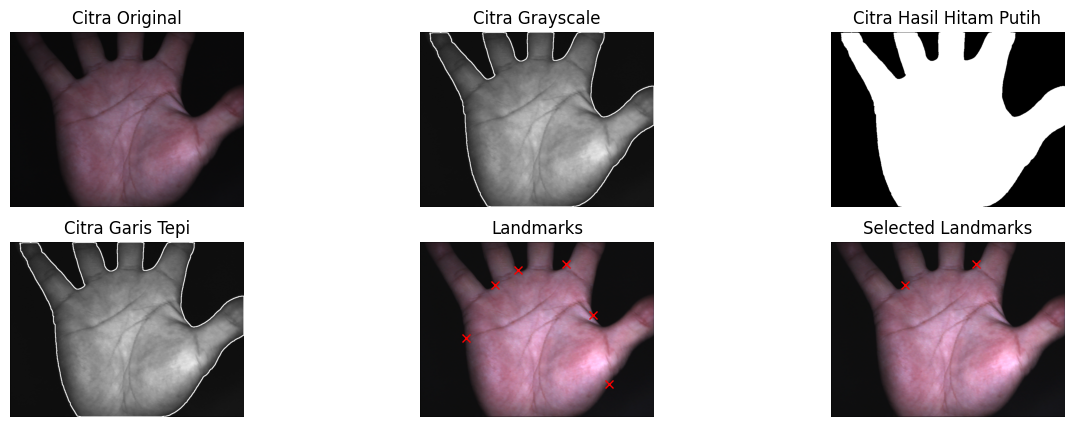

In [26]:
y_rank = np.array(np.argsort(landmarks["y"]))
landmarks_selected = {"x": np.array(landmarks["x"])[
y_rank][:3], "y": np.array(landmarks["y"])[y_rank][:3]}

x_rank = np.array(np.argsort(landmarks_selected["x"]))
landmarks_selected = {"x": landmarks_selected["x"][x_rank][[0, 2]], "y": landmarks_selected["y"][x_rank][[0, 2]]}


fig, axes = plt.subplots(2, 3, figsize=(15, 5))
axes[0,0].imshow(citra_rgb)
axes[0,0].set_title("Citra Original")
axes[0,0].axis('off')

axes[0,1].imshow(citra_grayscale, cmap='gray')
axes[0,1].set_title("Citra Grayscale")
axes[0,1].axis('off')

axes[0,2].imshow(thresh_img,cmap='gray')
axes[0,2].set_title("Citra Hasil Hitam Putih")
axes[0,2].axis('off')

axes[1,0].imshow(boundary_image, cmap='gray')
axes[1,0].set_title("Citra Garis Tepi")
axes[1,0].axis('off')

axes[1, 1].imshow(contour_img, cmap='gray')
for idx in range(len(landmarks["x"])):
    axes[1, 1].plot(landmarks["x"][idx], landmarks["y"][idx], 'rx')
axes[1, 1].set_title("Landmarks")
axes[1, 1].axis('off')

axes[1, 2].imshow(contour_img, cmap='gray')
axes[1, 2].plot(landmarks_selected["x"][0],landmarks_selected["y"][0], 'rx')
axes[1, 2].plot(landmarks_selected["x"][1],landmarks_selected["y"][1], 'rx')
axes[1, 2].set_title("Selected Landmarks")
axes[1, 2].axis('off')

plt.show()


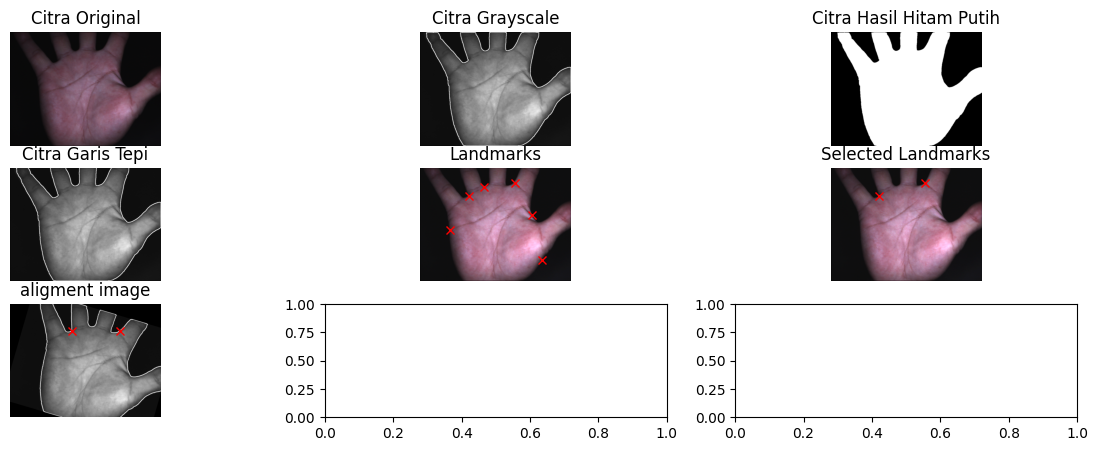

In [27]:
h, w, _ = new_image.shape
theta = np.arctan2((landmarks_selected["y"][1] - landmarks_selected["y"][0]), (landmarks_selected["x"][1] - landmarks_selected["x"][0]))*180/np.pi
center = (h/2,w/2)
# print( landmarks_selected.astype(int))
R = cv2.getRotationMatrix2D(center, theta, scale=1)
align_img = cv2.warpAffine(citra_grayscale, R, (w, h))

point_1 = [landmarks_selected["x"][0], landmarks_selected["y"][0]]
point_2 = [landmarks_selected["x"][1], landmarks_selected["y"][1]]
point_1 = (R[:, :2] @ point_1 + R[:, -1]).astype(int)
point_2 = (R[:, :2] @ point_2 + R[:, -1]).astype(int)

landmarks_selected_align = {"x": [point_1[0], point_2[0]], "y": [point_1[1], point_2[1]]}

fig, axes = plt.subplots(3, 3, figsize=(15, 5))
axes[0,0].imshow(citra_rgb)
axes[0,0].set_title("Citra Original")
axes[0,0].axis('off')

axes[0,1].imshow(citra_grayscale, cmap='gray')
axes[0,1].set_title("Citra Grayscale")
axes[0,1].axis('off')

axes[0,2].imshow(thresh_img,cmap='gray')
axes[0,2].set_title("Citra Hasil Hitam Putih")
axes[0,2].axis('off')

axes[1,0].imshow(boundary_image, cmap='gray')
axes[1,0].set_title("Citra Garis Tepi")
axes[1,0].axis('off')

axes[1, 1].imshow(contour_img, cmap='gray')
for idx in range(len(landmarks["x"])):
    axes[1, 1].plot(landmarks["x"][idx], landmarks["y"][idx], 'rx')
axes[1, 1].set_title("Landmarks")
axes[1, 1].axis('off')

axes[1, 2].imshow(contour_img, cmap='gray')
axes[1, 2].plot(landmarks_selected["x"][0],landmarks_selected["y"][0], 'rx')
axes[1, 2].plot(landmarks_selected["x"][1],landmarks_selected["y"][1], 'rx')
axes[1, 2].set_title("Selected Landmarks")
axes[1, 2].axis('off')

axes[2, 0].imshow(align_img, cmap='gray')
axes[2, 0].plot(landmarks_selected_align["x"][0],landmarks_selected_align["y"][0], 'rx')
axes[2, 0].plot(landmarks_selected_align["x"][1],landmarks_selected_align["y"][1], 'rx')
axes[2, 0].set_title("aligment image")
axes[2, 0].axis('off')

plt.show()



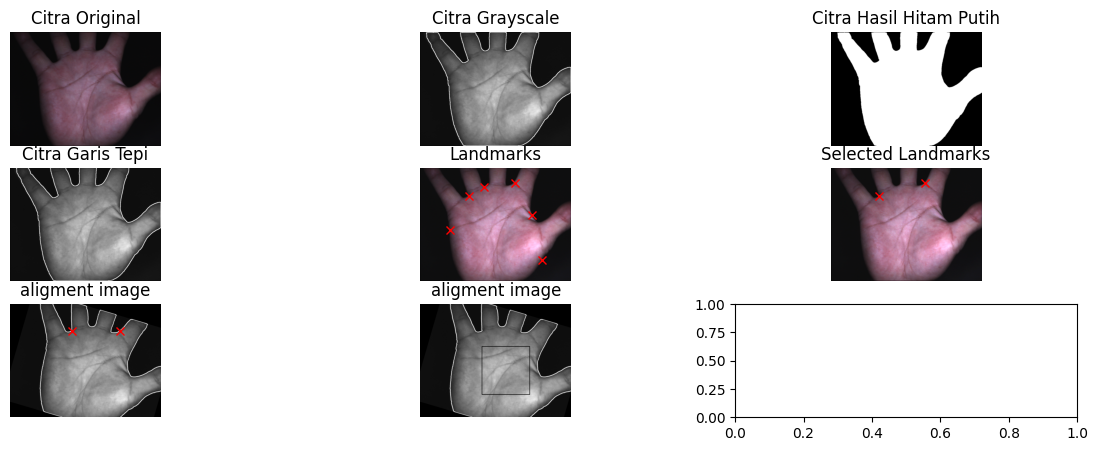

In [28]:
point_1 = np.array([landmarks_selected_align["x"][0], landmarks_selected_align["y"][0]])
point_2 = np.array([landmarks_selected_align["x"][1], landmarks_selected_align["y"][1]])

ux = point_1[0]
uy = point_1[1] + (point_2-point_1)[0]//3
lx = point_2[0]
ly = point_2[1] + 4*(point_2-point_1)[0]//3

align_img_8u = cv2.convertScaleAbs(align_img, alpha=(255.0/np.max(align_img)))
rectangle_sign =cv2.rectangle(align_img_8u, (lx, ly),(ux, uy), (0, 255, 0), 2)

fig, axes = plt.subplots(3, 3, figsize=(15, 5))
axes[0,0].imshow(citra_rgb)
axes[0,0].set_title("Citra Original")
axes[0,0].axis('off')

axes[0,1].imshow(citra_grayscale, cmap='gray')
axes[0,1].set_title("Citra Grayscale")
axes[0,1].axis('off')

axes[0,2].imshow(thresh_img,cmap='gray')
axes[0,2].set_title("Citra Hasil Hitam Putih")
axes[0,2].axis('off')

axes[1,0].imshow(boundary_image, cmap='gray')
axes[1,0].set_title("Citra Garis Tepi")
axes[1,0].axis('off')

axes[1, 1].imshow(contour_img, cmap='gray')
for idx in range(len(landmarks["x"])):
    axes[1, 1].plot(landmarks["x"][idx], landmarks["y"][idx], 'rx')
axes[1, 1].set_title("Landmarks")
axes[1, 1].axis('off')

axes[1, 2].imshow(contour_img, cmap='gray')
axes[1, 2].plot(landmarks_selected["x"][0],landmarks_selected["y"][0], 'rx')
axes[1, 2].plot(landmarks_selected["x"][1],landmarks_selected["y"][1], 'rx')
axes[1, 2].set_title("Selected Landmarks")
axes[1, 2].axis('off')

axes[2, 0].imshow(align_img, cmap='gray')
axes[2, 0].plot(landmarks_selected_align["x"][0],landmarks_selected_align["y"][0], 'rx')
axes[2, 0].plot(landmarks_selected_align["x"][1],landmarks_selected_align["y"][1], 'rx')
axes[2, 0].set_title("aligment image")
axes[2, 0].axis('off')

axes[2, 1].imshow(rectangle_sign, cmap='gray')
axes[2, 1].set_title("aligment image")
axes[2, 1].axis('off')

plt.show()


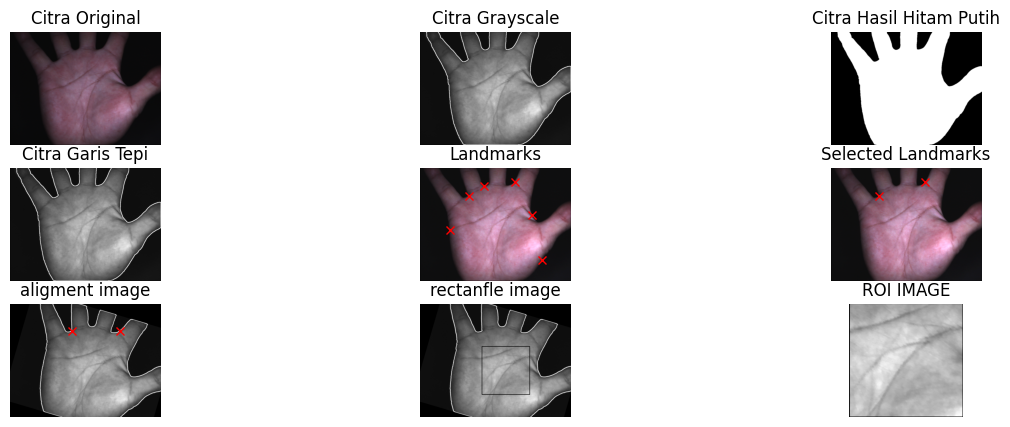

In [29]:
roi_img = align_img_8u[uy:ly, ux:lx]

rectified_image_equalized = cv2.equalizeHist(roi_img)

fig, axes = plt.subplots(3, 3, figsize=(15, 5))
axes[0,0].imshow(citra_rgb)
axes[0,0].set_title("Citra Original")
axes[0,0].axis('off')

axes[0,1].imshow(citra_grayscale, cmap='gray')
axes[0,1].set_title("Citra Grayscale")
axes[0,1].axis('off')

axes[0,2].imshow(thresh_img,cmap='gray')
axes[0,2].set_title("Citra Hasil Hitam Putih")
axes[0,2].axis('off')

axes[1,0].imshow(boundary_image, cmap='gray')
axes[1,0].set_title("Citra Garis Tepi")
axes[1,0].axis('off')

axes[1, 1].imshow(contour_img, cmap='gray')
for idx in range(len(landmarks["x"])):
    axes[1, 1].plot(landmarks["x"][idx], landmarks["y"][idx], 'rx')
axes[1, 1].set_title("Landmarks")
axes[1, 1].axis('off')

axes[1, 2].imshow(contour_img, cmap='gray')
axes[1, 2].plot(landmarks_selected["x"][0],landmarks_selected["y"][0], 'rx')
axes[1, 2].plot(landmarks_selected["x"][1],landmarks_selected["y"][1], 'rx')
axes[1, 2].set_title("Selected Landmarks")
axes[1, 2].axis('off')

axes[2, 0].imshow(align_img, cmap='gray')
axes[2, 0].plot(landmarks_selected_align["x"][0],landmarks_selected_align["y"][0], 'rx')
axes[2, 0].plot(landmarks_selected_align["x"][1],landmarks_selected_align["y"][1], 'rx')
axes[2, 0].set_title("aligment image")
axes[2, 0].axis('off')

axes[2, 1].imshow(rectangle_sign, cmap='gray')
axes[2, 1].set_title("aligment image")
axes[2, 1].axis('off')

axes[2, 1].imshow(rectangle_sign, cmap='gray')
axes[2, 1].set_title("rectanfle image")
axes[2, 1].axis('off')

axes[2, 2].imshow(roi_img, cmap='gray')
axes[2, 2].set_title("ROI IMAGE")
axes[2, 2].axis('off')



plt.show()

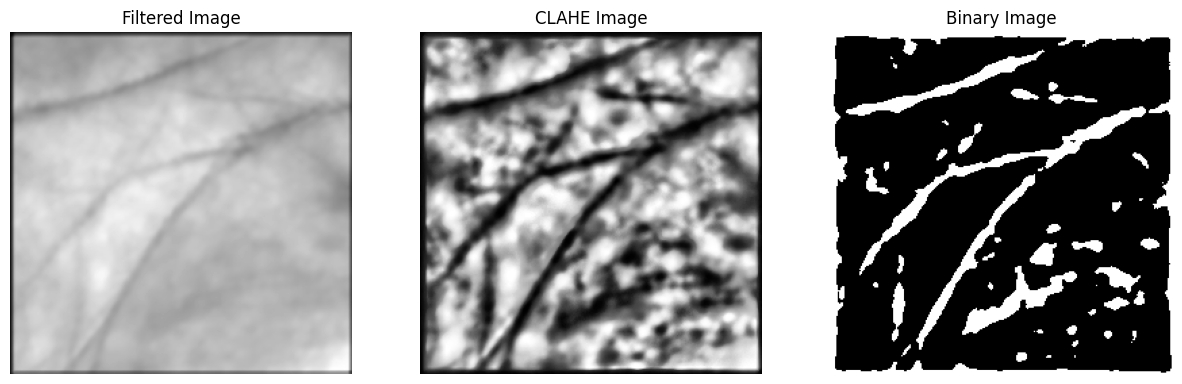

In [30]:
g_kernel_size = 5
g_sigma = 2.5
g_theta = np.pi / 3
g_lambda = 8.1
g_gamma = 0.4
g_psi = 0.0

# Fungsi untuk membuat kernel Gabor
def gabor_kernel(ksize, sigma, theta, lambd, gamma, psi):
    y, x = np.meshgrid(np.arange(-ksize//2 + 1, ksize//2 + 1), np.arange(-ksize//2 + 1, ksize//2 + 1))
    rotx = x * np.cos(theta) + y * np.sin(theta)
    roty = -x * np.sin(theta) + y * np.cos(theta)
    g = np.exp(-0.5 * (rotx**2 / sigma**2 + roty**2 / (sigma**2 / gamma**2)))
    g *= np.cos(2 * np.pi / lambd * rotx + psi)
    return g.astype(np.float32)

# Membuat kernel Gabor
g_kernel = gabor_kernel(g_kernel_size, g_sigma, g_theta, g_lambda, g_gamma, g_psi)

# Terapkan filter Gabor
filtered_veins = convolve(roi_img.astype(np.float32), g_kernel)

# Fungsi untuk menormalkan gambar
def normalize(img):
    img_min = np.min(img)
    img_max = np.max(img)
    normalized_img = 255 * (img - img_min) / (img_max - img_min)
    return normalized_img.astype(np.uint8)


# Normalisasi gambar hasil filter
normalized_filtered_veins = normalize(filtered_veins)

# Terapkan CLAHE beberapa kali
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(2, 2))
clahe_veins = clahe.apply(normalized_filtered_veins)

clahe_blurred = cv2.GaussianBlur(clahe_veins, (5, 5), 0)  # gaussian blur

clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(4, 4))
clahe_veins = clahe.apply(clahe_blurred)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_veins = clahe.apply(clahe_veins)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(10, 10))
clahe_veins = clahe.apply(clahe_veins)

# Binarisasi gambar hasil CLAHE
threshold_veins = 60
binary_veins = (clahe_veins < threshold_veins).astype(np.uint8) * 255

# Plot hasil
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(normalized_filtered_veins, cmap='gray')
axes[0].set_title("Filtered Image")
axes[0].axis('off')

axes[1].imshow(clahe_veins, cmap='gray')
axes[1].set_title("CLAHE Image")
axes[1].axis('off')

axes[2].imshow(binary_veins, cmap='gray')
axes[2].set_title("Binary Image")
axes[2].axis('off')

plt.show()
